In [9]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [348]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)
houses.describe()
houses

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21
20637,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32


Looking at the jumps between the quartiles within this dataset we can see a large spanning when it comes to housing prices from 14,000-500,000. One glaring issue is the pricing of a house at
£14,000 which is very abnormal when it comes to an average housing market as properties at that low of a value are rare to non existent. This is a large indicator that our dataset is
perhaps not very reliable.

In [349]:
# looking for missing values
print(houses)
print(houses.isnull().sum())

       median_house_value  median_income  housing_median_age  total_rooms  \
0                452600.0         8.3252                41.0        880.0   
1                358500.0         8.3014                21.0       7099.0   
2                352100.0         7.2574                52.0       1467.0   
3                341300.0         5.6431                52.0       1274.0   
4                342200.0         3.8462                52.0       1627.0   
...                   ...            ...                 ...          ...   
20635             78100.0         1.5603                25.0       1665.0   
20636             77100.0         2.5568                18.0        697.0   
20637             92300.0         1.7000                17.0       2254.0   
20638             84700.0         1.8672                18.0       1860.0   
20639             89400.0         2.3886                16.0       2785.0   

       total_bedrooms  population  households  latitude  longitude  
0     

The dataset contains no missing values therefore nothing needs to be imputed however we can see that each entry is based on a large number of households and only the median values have
been adjusted according to the number of households within each entry.

**After Attempting this I found that my outlier detection became much worse than it was before and that simply leaving the data unedited made it alot better so i have removed the scaling**
- My next step is going to be dividing population, total_bedrooms and total_rooms by the number of households in order to get a classification that would work better if you were trying to
create a model to predict the house price of a single house.





In [350]:
toBeAdjusted = ["total_rooms", "total_bedrooms", "population"]
# for column in toBeAdjusted:
#     houses[column] = houses[column] / houses["households"]
# houses

### plotting utility

In [10]:
## plotting utility

import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import RobustScaler
import numpy as np
from math import ceil

##
## type= {boxplot, kdeplot}
##
def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))
    
    if type not in {'boxplot', 'dkeplot'}:
        print("type= {boxplot, dkeplot} only are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4
    
    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)
    
    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    print(axs)

#         handle special axes
    if numRows == 1 and numCols == 1:
        c = columns[0]
        # axes is a scalar
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs)
        else:
            sns.kdeplot(data=data, x=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        # axes is a 1D array
        for c in columns:
#         print("column {c}".format(c=c))
            if type == 'boxplot':
                sns.boxplot(data=data, x=c, ax=axs[i])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i])
            axs[i].set_title(c)
            i = i+1
        
    else:
    # general case of a 2D grid    
        i=j=0    
        for c in columns:
            print("column {c}".format(c=c))
            if type == 'boxplot':
                print("plotting on axes [{0},{1}]".format(i,j))
                sns.boxplot(data=data, x=c, ax=axs[i,j])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i,j])

            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0


### Descriptive analytics: start by looking at raw statistics for the features in this dataset. what sort of story are they telling?

feel free to use the plot utility defined above

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


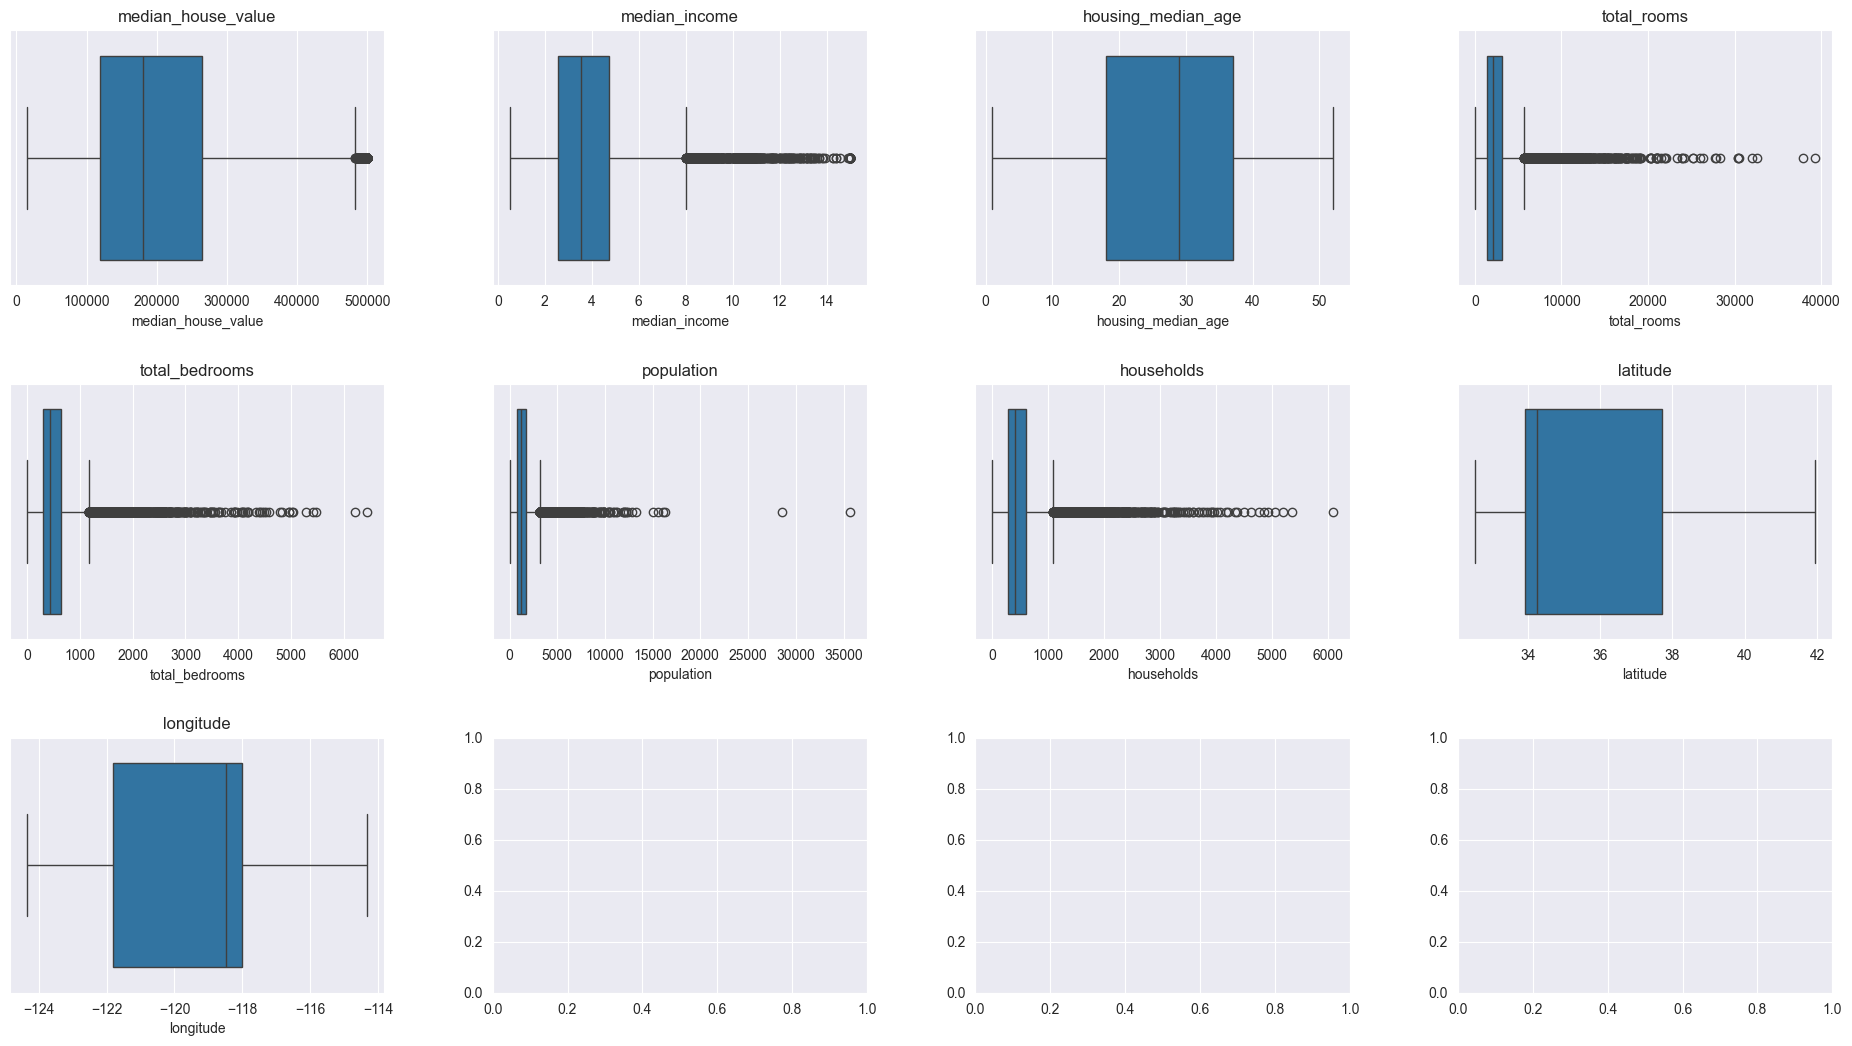

In [352]:
## your code here
plot_distributions(houses,houses.columns)

## Looking for relationships between variables and house pricing

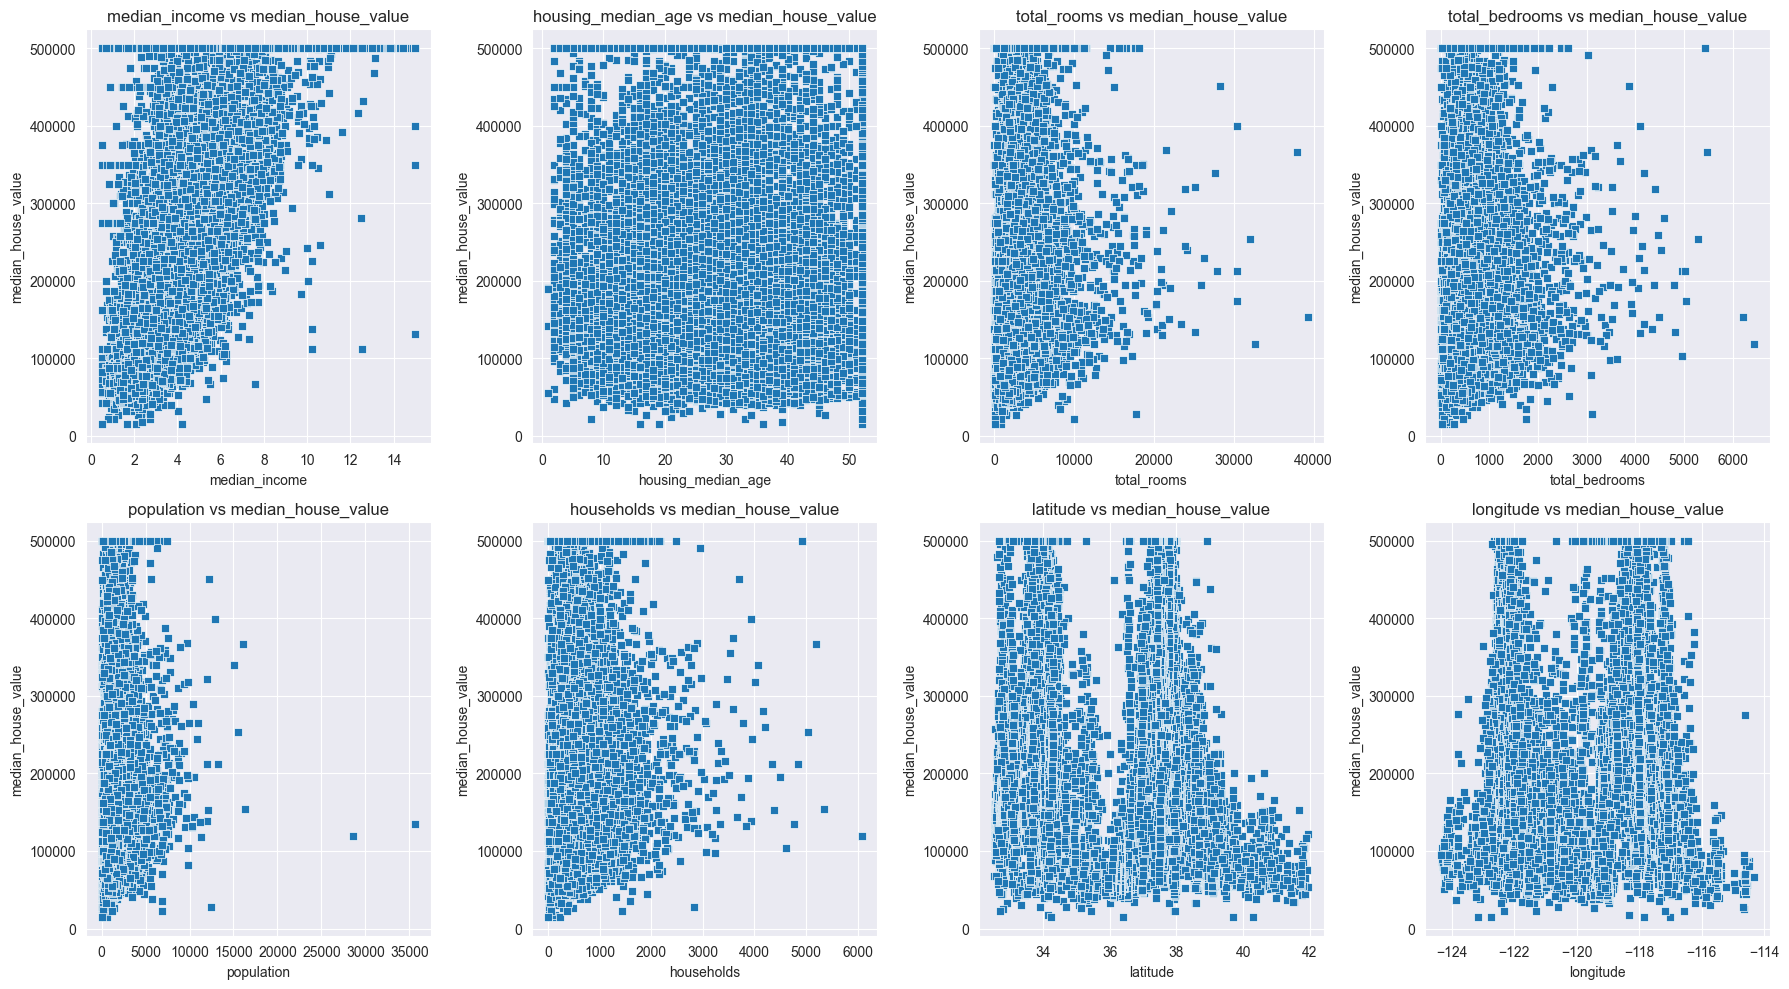

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

def compare_to_column(dataframe, specific_column):
    num_columns = len(dataframe.columns) -1
    num_rows = (num_columns + 1) // 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, num_rows * 5))
    axes = axes.flatten()
    for i, column in enumerate(dataframe.columns):
        if column != specific_column:
            sns.scatterplot(x=column, y=specific_column, data=dataframe, ax=axes[i -1], marker='s')
            axes[i-1].set_title(f'{column} vs {specific_column}')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plots
    plt.show()
compare_to_column(houses,"median_house_value")


Looking at these scatters there are many values tightly clumped together because of the outliers that extent the boundaries of the graph and make it difficult to see any clear information that we are looking for. The most egregious example of this is within the graph for population

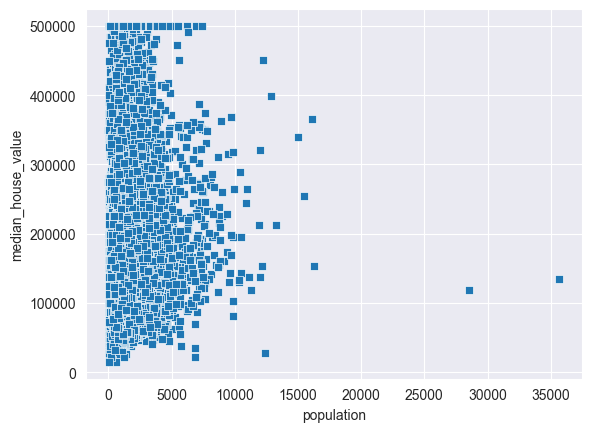

In [354]:
sns.scatterplot(x='population', y='median_house_value', data=houses, marker='s')
plt.show()

As we can see within the graph above all the data is shoved into the left side of the screen making it very difficult to find any information out how total_rooms affects the pricing

### feature normalisation 

Some of the features need to be normalised before any conclusion can be drawn

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


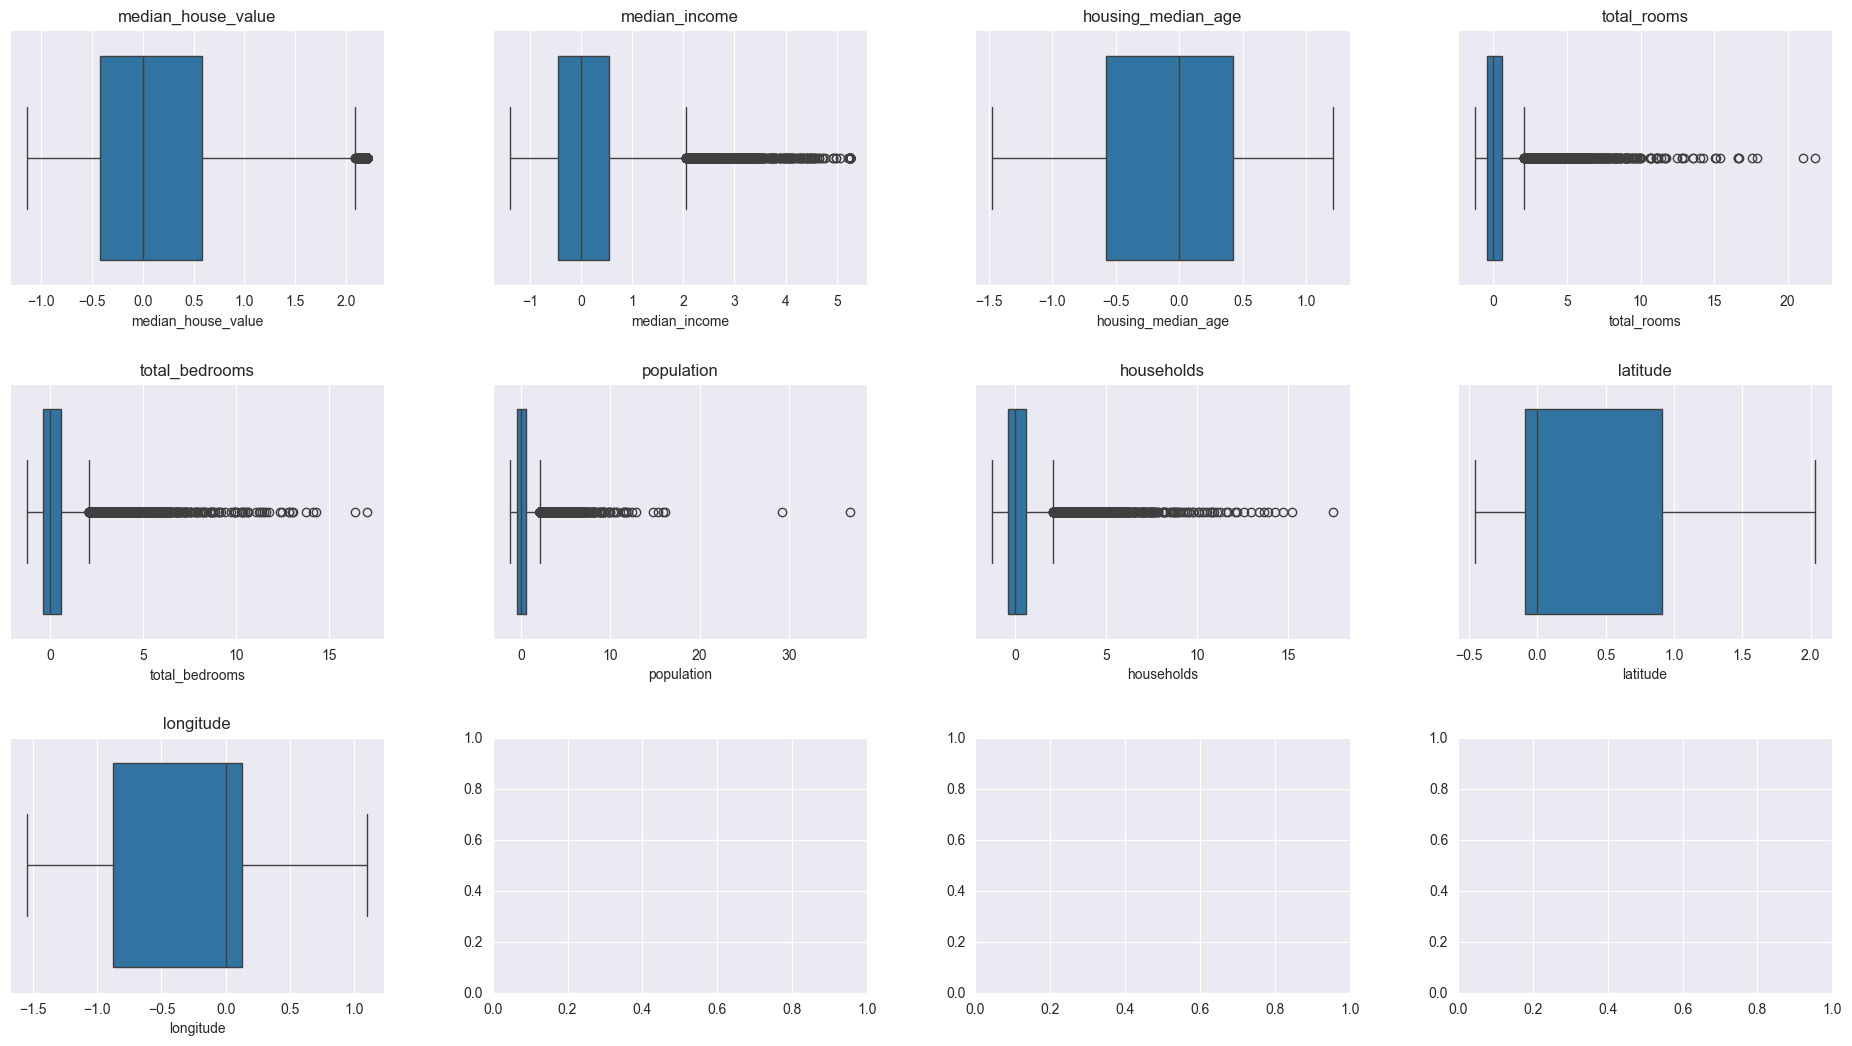

In [355]:
## normalising the features -- your code here
robust_scaler = RobustScaler()
# Using a robust scaler as it is more outlier resistant compared to the standard scaler
houses_robust_scaled = robust_scaler.fit_transform(houses)

houses_robust_scaled = pd.DataFrame(houses_robust_scaled, columns=houses.columns)

plot_distributions(houses_robust_scaled, houses_robust_scaled.columns)

### record identification

based on analysis of the normalised features, try and pinpoint specific records that may be outliers, and explain why

In [356]:
percentage_sum = 0;
for column in houses_robust_scaled:
    # using z score calculation (z = (value - mean) / standard deviation)
    z = (houses_robust_scaled[column] - houses_robust_scaled[column].mean()) / houses_robust_scaled[column].std()
    # This is the number of standard deviations we can adjust this in order to see where the increase begins to slow
    threshold = 2.55
    # Z.abs is used to ensure that negative std is calculated the same as positive
    percentage_within_threshold = ((z.abs() <= threshold).sum() / len(z)) * 100
    print(f'for {column}, {percentage_within_threshold}% of values fall within {threshold} standard deviations')
    percentage_sum += percentage_within_threshold
print(f'average:{percentage_sum / len(houses_robust_scaled.columns)}')

for median_house_value, 100.0% of values fall within 2.55 standard deviations
for median_income, 97.75678294573643% of values fall within 2.55 standard deviations
for housing_median_age, 100.0% of values fall within 2.55 standard deviations
for total_rooms, 97.57751937984496% of values fall within 2.55 standard deviations
for total_bedrooms, 97.48546511627907% of values fall within 2.55 standard deviations
for population, 97.62596899224806% of values fall within 2.55 standard deviations
for households, 97.44186046511628% of values fall within 2.55 standard deviations
for latitude, 99.6608527131783% of values fall within 2.55 standard deviations
for longitude, 99.99515503875969% of values fall within 2.55 standard deviations
average:98.61595607235142


The change between 1std and 2std was a massive jump from and average of 70 to an average of 96. At 2.55, I decided to
stop increasing values as the change in % became very small. Removing using a threshold of 2.55 would mean removing
around 1.4% of data per colum ignoring median house value and housing median age.

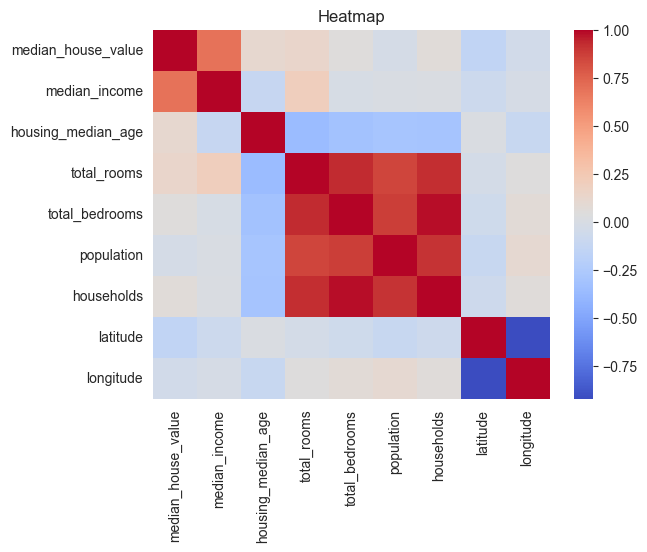

                    median_house_value  median_income  housing_median_age  \
median_house_value            1.000000       0.688075            0.105623   
median_income                 0.688075       1.000000           -0.119034   
housing_median_age            0.105623      -0.119034            1.000000   
total_rooms                   0.134153       0.198050           -0.361262   
total_bedrooms                0.050594      -0.008093           -0.320485   
population                   -0.024650       0.004834           -0.296244   
households                    0.065843       0.013033           -0.302916   
latitude                     -0.144160      -0.079809            0.011173   
longitude                    -0.045967      -0.015176           -0.108197   

                    total_rooms  total_bedrooms  population  households  \
median_house_value     0.134153        0.050594   -0.024650    0.065843   
median_income          0.198050       -0.008093    0.004834    0.013033   
hous

In [357]:
# Importance of columns
sns.heatmap(houses_robust_scaled.corr(), cmap='coolwarm')
plt.title('Heatmap')
plt.show()
print(houses_robust_scaled.corr())

Before looking at columns I may want to remove I decided to first look for outliers as I believed that even columns that I would not want included may contain information that shows that
data was collected incorrectly or that there is data that might contain other forms of errors.

In [358]:
def get_outlier_indexes(column_for_indexes, threshold_indexes):
    z_scores = (column_for_indexes - column_for_indexes.mean()) / column_for_indexes.std()
    return z_scores[abs(z_scores) > threshold_indexes].index


def get_indexes_for_dataset(dataset, threshold_dataset):
    all_outlier_indexes = []
    for col in dataset.columns:
        new_vales = get_outlier_indexes(dataset[col], threshold_dataset)
        for value in new_vales:
            # Check for duplicates
            if value not in all_outlier_indexes:
                all_outlier_indexes.append(value)
    return all_outlier_indexes



main_outliers = get_indexes_for_dataset(houses_robust_scaled, 2.55)
print(f'number of outliers: {len(main_outliers)}')
# Reporting the indexes of outliers is required in the brief
print(main_outliers)

number of outliers: 1288
[131, 155, 407, 409, 494, 510, 511, 512, 514, 517, 923, 977, 986, 996, 1541, 1561, 1563, 1564, 1566, 1574, 1582, 1583, 1585, 1586, 1589, 1591, 1593, 1602, 1617, 1621, 1628, 1629, 1636, 1637, 1638, 1644, 1645, 1646, 1655, 2213, 2214, 2215, 2826, 2969, 3472, 3481, 3486, 3533, 3542, 3561, 3571, 3858, 3953, 4014, 4018, 4039, 4042, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4056, 4070, 4071, 4074, 4077, 4111, 4116, 4220, 4229, 4319, 4345, 4352, 4353, 4354, 4492, 4603, 4604, 4605, 4606, 4622, 4626, 4677, 4678, 5242, 5243, 5244, 5246, 5247, 5248, 5250, 5252, 5253, 5254, 5256, 5257, 5258, 5259, 5260, 5264, 5266, 5269, 5271, 5272, 5273, 5275, 5277, 5279, 5280, 5281, 5291, 5292, 5295, 5304, 5305, 5318, 5351, 5352, 5360, 5361, 5368, 5493, 5494, 5537, 5728, 5738, 6073, 6204, 6226, 6374, 6389, 6391, 6392, 6399, 6551, 6556, 6557, 6576, 6578, 6585, 6590, 6591, 6592, 6593, 6594, 6712, 6720, 6724, 6725, 6726, 6727, 6728, 6729, 6731, 6732, 6735, 6736, 6915, 6918, 6919, 8311, 8578

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]
20640
19352


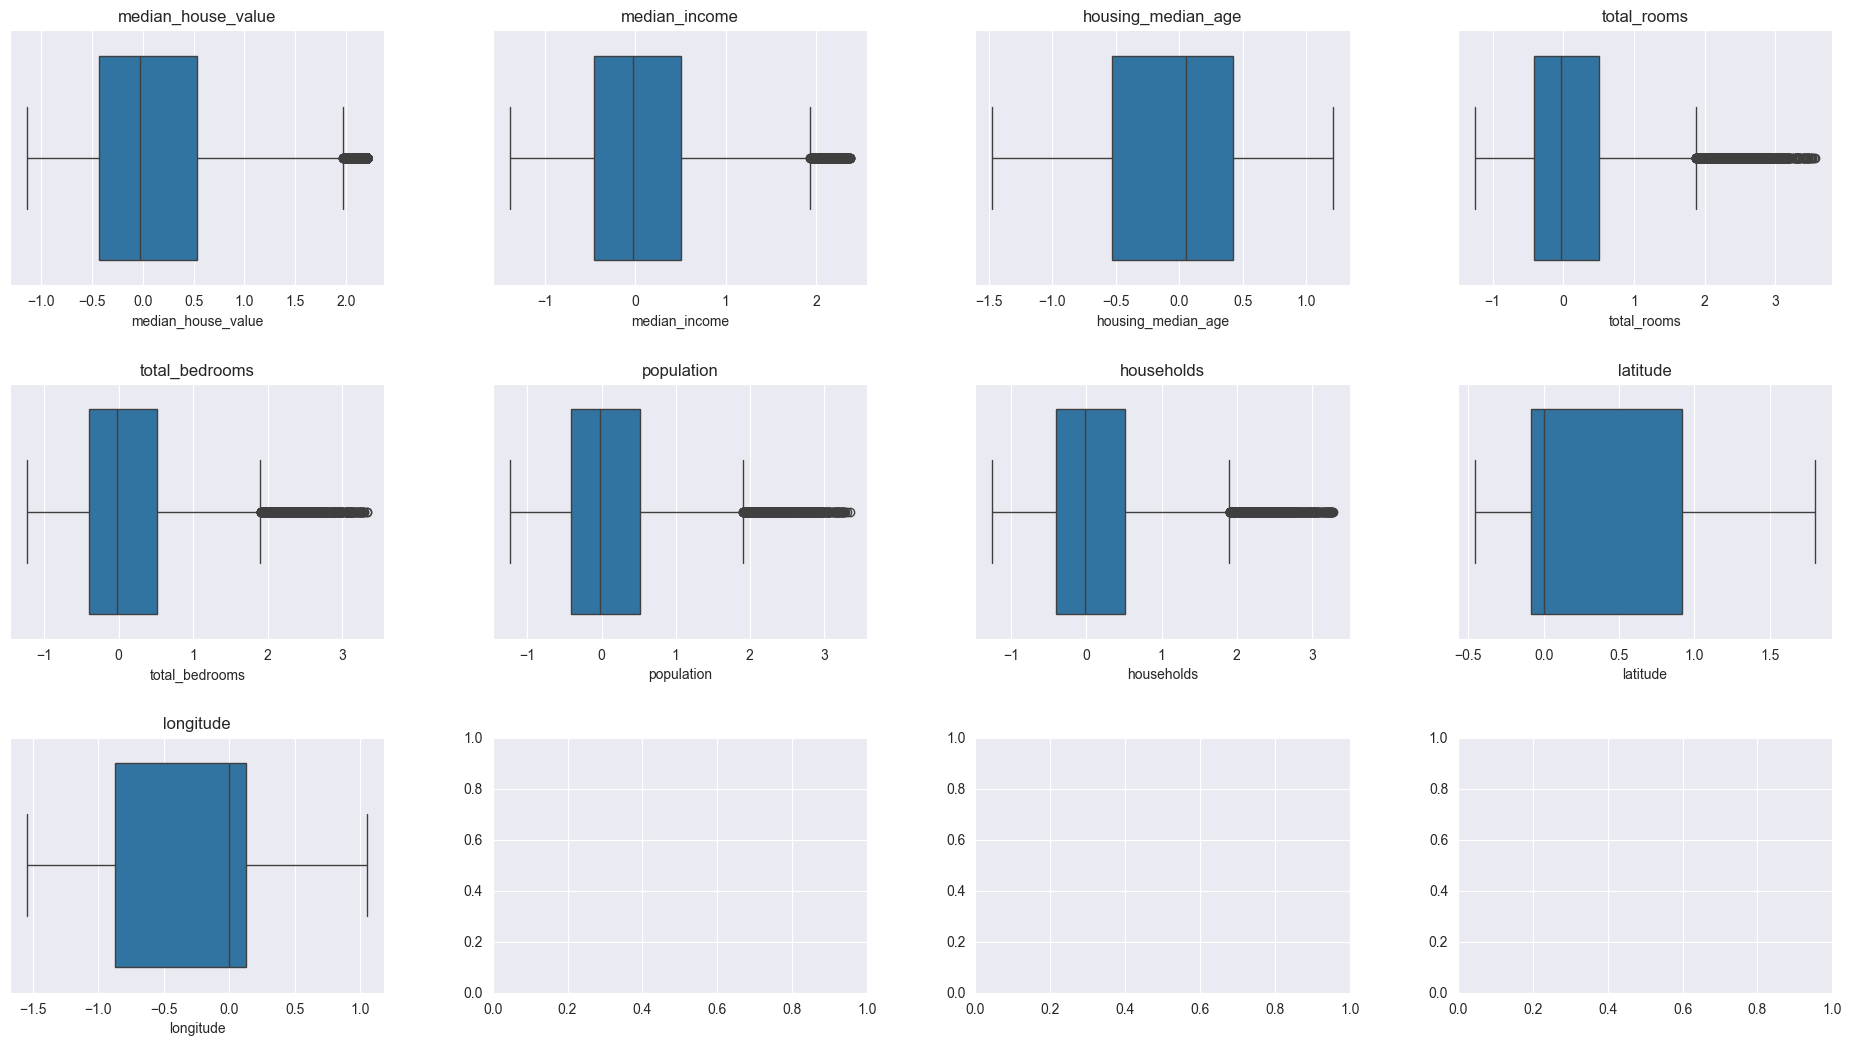

In [359]:
# Remove outliers
houses_outliers_removed = houses_robust_scaled.drop(main_outliers)
plot_distributions(houses_outliers_removed, houses_outliers_removed.columns)
print(len(houses))
print(len(houses_outliers_removed))

have you completely solved the problem? how do we know for sure?

we may have removed too much (FP) or too little (FN). Can you suggest empirical validation of your findings?

I wanted to only keep one of either total_rooms or total bedrooms as I believed that having two columns related to rooms
would lead to a model that would hold room amount as twice as important as other aspects.
While total_rooms has a higher correlation to price, most houses are priced based off of their number of bedrooms,
therefore I will only be keeping number of bedrooms in my main dataset

In [360]:
#dropping from both datasets to help with comparisons
houses.drop(columns='total_rooms', axis=1, inplace=True)
houses_outliers_removed.drop(columns='total_rooms', axis=1, inplace=True)

Text(0.5, 1.0, 'After removal of outliers')

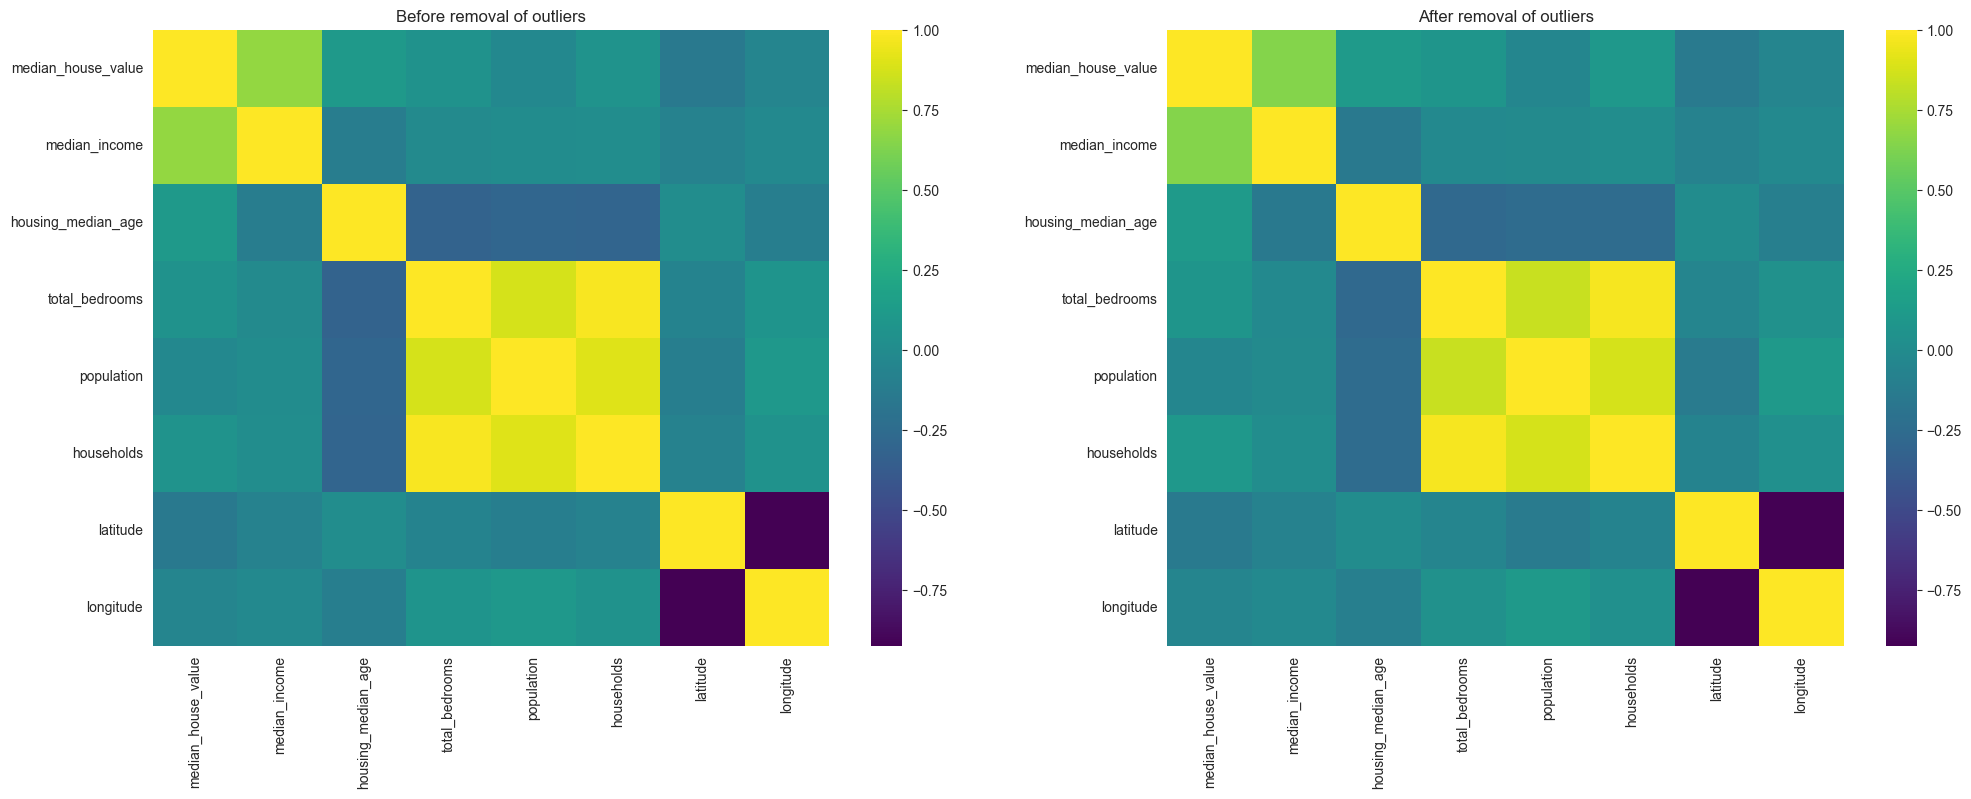

In [361]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
sns.heatmap(houses.corr(), cmap='viridis', ax=axes[0])
sns.heatmap(houses_outliers_removed.corr(), cmap='viridis', ax=axes[1])
axes[0].set_title('Before removal of outliers')
axes[1].set_title('After removal of outliers')

Using correlation matrices we can visually see that both before and after our preprocessing steps, our value correlation remains mostly the same.
This is a good indication that our preprocessing hasn't altered the overall quality of our data or at least that there aren't any major differences that would drastically alter the results
of models created with this data.

I want to see if our issue from before relating to values being restricted to one corner of the graph by outliers has now been fixed.

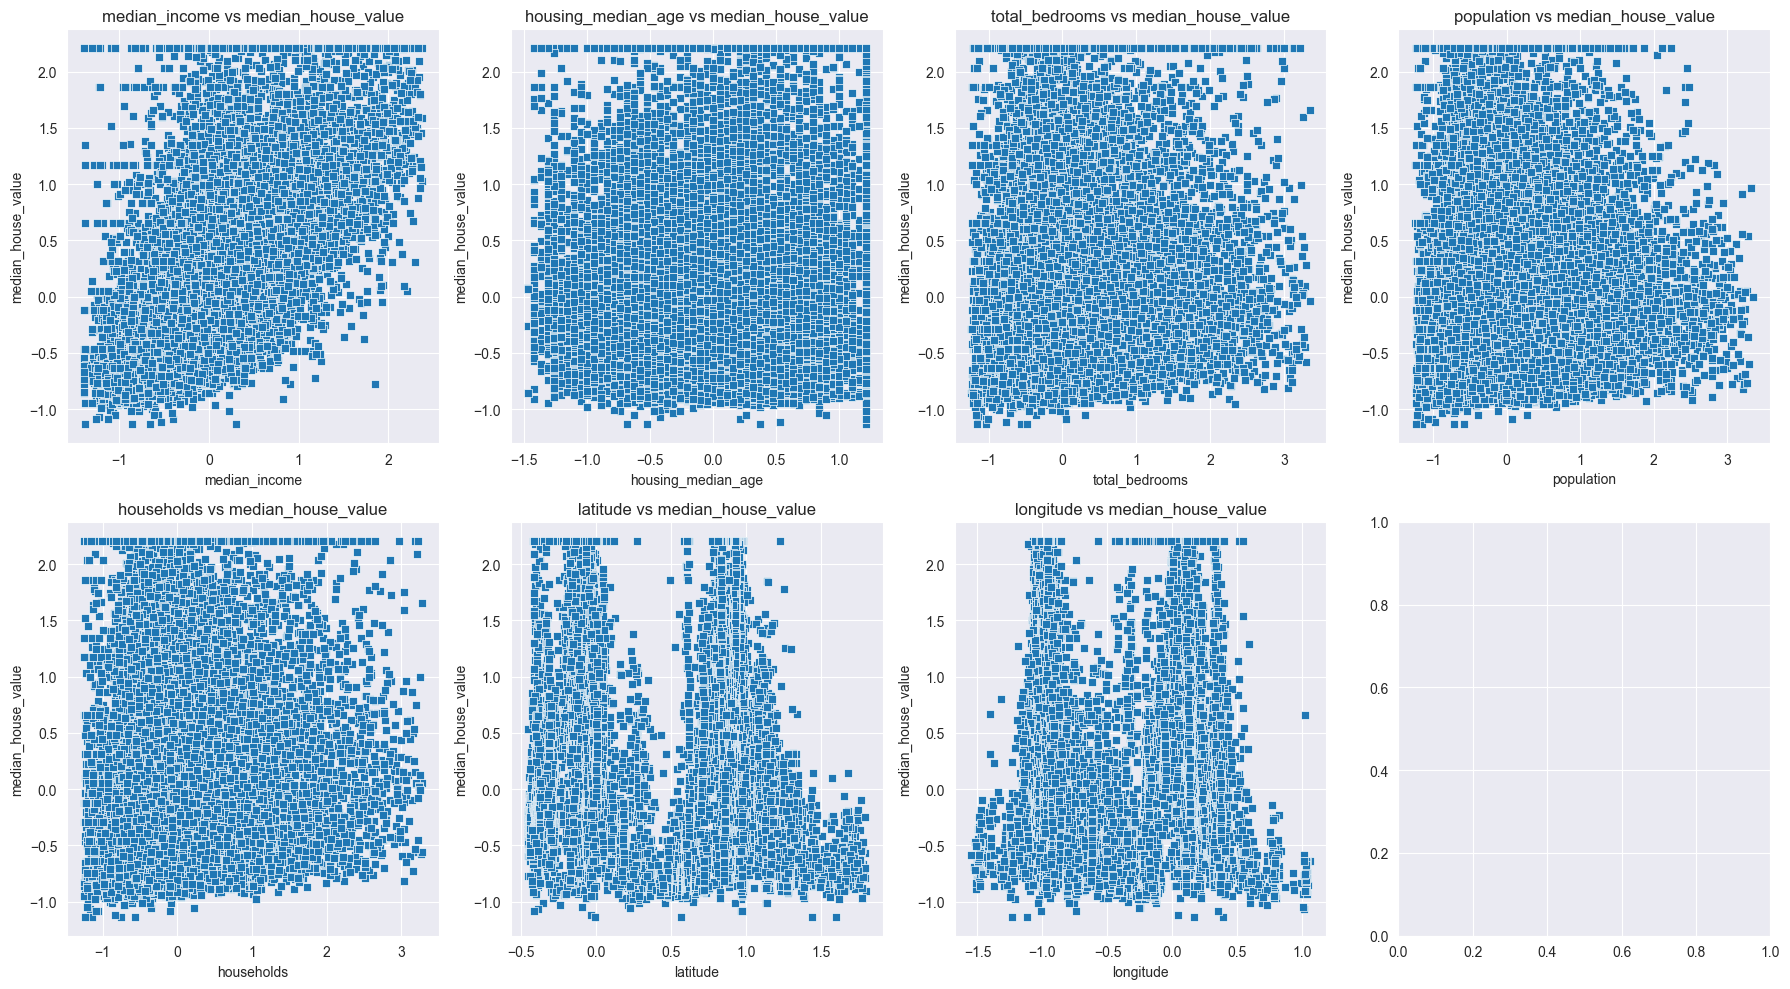

In [362]:
compare_to_column(houses_outliers_removed, "median_house_value")

Whilest this method has removed outliers, the robust scaler has made it so that not all our columns are scaled correctly, a method that may have been better for a machine learning approch would have been to either:
- Robust scale everything
- Compute outlier indexes
- Remove the indexes from the original dataset
- Minmax scale the data
or
- Don't scale the data
- Remove outliers
- Minmax scale the data

## next, try using LOF and / or KNN and see if the results align with your empirical analysis

In [363]:
from sklearn.neighbors import LocalOutlierFactor
# Our outlier detection model, n can be adjusted to fine tune detection
# We will fit our lof to the number of outliers to the same size as our initial prediction so that the quantity matches up as this is our expected percentage of outliers 0.0624
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.0624)
X = houses_robust_scaled.copy()

# Fit the model and predict outliers
outlier_values = lof.fit_predict(X)
main_outliers_lof = []
counter = 0
for i in outlier_values:
    if i == -1:
        main_outliers_lof.append(counter)
    counter+=1
# Get the indexes of the outliers
print(f'lof size: {len(main_outliers_lof)} pred size: {len(main_outliers)}')

lof size: 1288 pred size: 1288


In [364]:
## your code here
# Compare results
counter = 0
for i in main_outliers_lof:
    if i in main_outliers:
        counter+=1
print(f'{counter} values match between predicted and lof giving a {round(((counter / 1288) * 100), 2)}% match')

216 values match between predicted and lof giving a 16.77% match


While we have matched up the number of outliers, we can see that using LOF our actual indexes are 16.77% similar. This is not a good indication when it comes to trusting our
initial outlier detection

In [365]:
# Because of this result I decided to also try KNN to see if our outliers fit any better when using this method
from sklearn.neighbors import NearestNeighbors
# I placed this within a function so that I could test for which parameters are best when matching to my prediction
def create_knn_model(neighbors, percentile):
    # Create our classifier, number of neighbors checked can be adjusted
    knn = NearestNeighbors(n_neighbors=neighbors)
    knn.fit(houses_robust_scaled)
    distances, _= knn.kneighbors(houses_robust_scaled)
    outlier_scores = np.max(distances, axis=1)
    percentile_threshold = np.percentile(outlier_scores, percentile)
    outliers = np.where(outlier_scores > percentile_threshold)[0]
    return outliers


In [366]:
# Compare against initial results
def compare_results(outliers, initial_values, n_number):
    matches = 0
    for i in outliers:
        if i in initial_values:
            matches +=1
    print(f'using: {n_number} {matches} values match between predicted and knn giving a {round(((matches / 1288) * 100), 2)}% match')

In [367]:
# Test for best n_neighbors value for matching our predicted set
# Warning this takes a while to run
for i in range(1,100):
    # 93.76 is used as it gives us 1288 values which matches the number of values predicted above
    main_outliers_knn = create_knn_model(i,93.76)
    compare_results(main_outliers_knn, main_outliers, i)

using: 1 0 values match between predicted and knn giving a 0.0% match
using: 2 629 values match between predicted and knn giving a 48.84% match
using: 3 675 values match between predicted and knn giving a 52.41% match
using: 4 724 values match between predicted and knn giving a 56.21% match
using: 5 742 values match between predicted and knn giving a 57.61% match
using: 6 760 values match between predicted and knn giving a 59.01% match
using: 7 770 values match between predicted and knn giving a 59.78% match
using: 8 787 values match between predicted and knn giving a 61.1% match
using: 9 793 values match between predicted and knn giving a 61.57% match
using: 10 801 values match between predicted and knn giving a 62.19% match
using: 11 803 values match between predicted and knn giving a 62.34% match
using: 12 811 values match between predicted and knn giving a 62.97% match
using: 13 810 values match between predicted and knn giving a 62.89% match
using: 14 819 values match between pred

Typically, I would use values between 15 and 30, with a dataframe with 20000 elements I wanted to see if a larger
sample would affect how the prediction matched my STD based outliers. Un-surprisingly as you increase the
number of neighbors compared the more the knn model matches my initial prediction.

If anything this loop simply displays the way that the smoothing affect moves knn away from local variation and
more towards matching the global variation of the data.

However, it is suggested that using a higher amount of neighbors reduces the amount of overfitting within the model
because of the fact it isn't as susceptible to local trends within the dataset but at a point you are pretty much just
pruning based off of the mean like I have already done, and you will save alot of time by just using my method

## Your overall conclusions here

KNN graphs


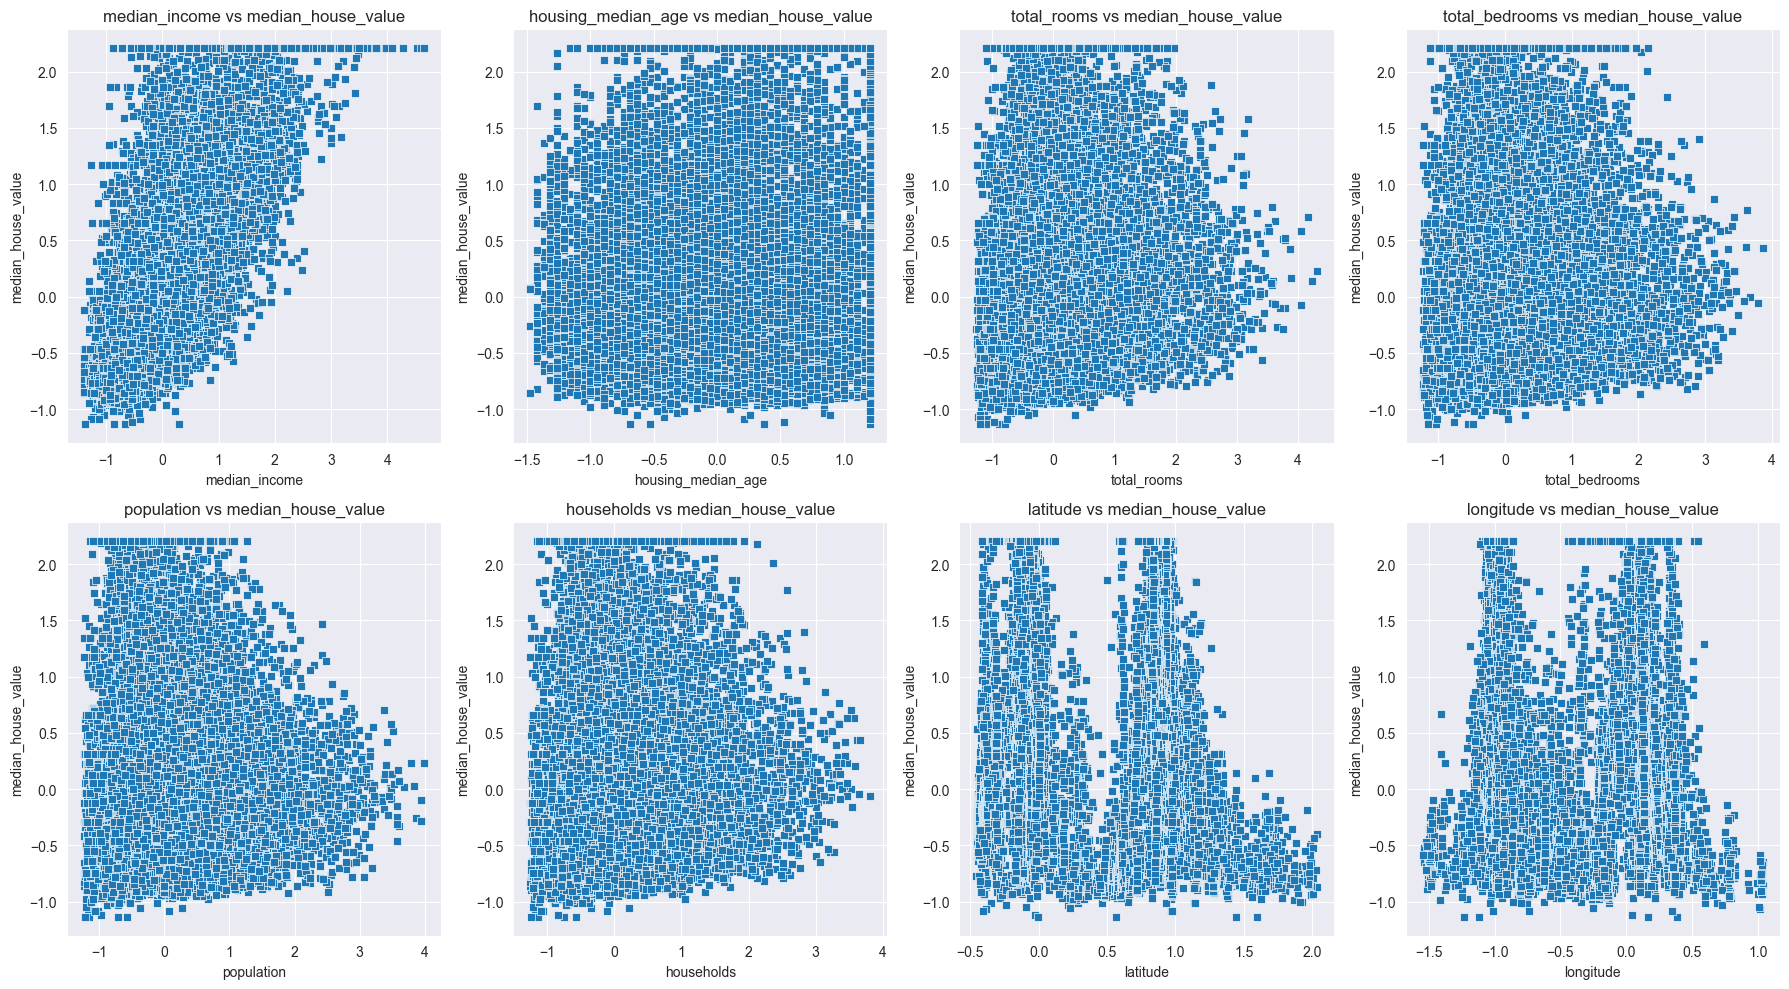

LOF graphs


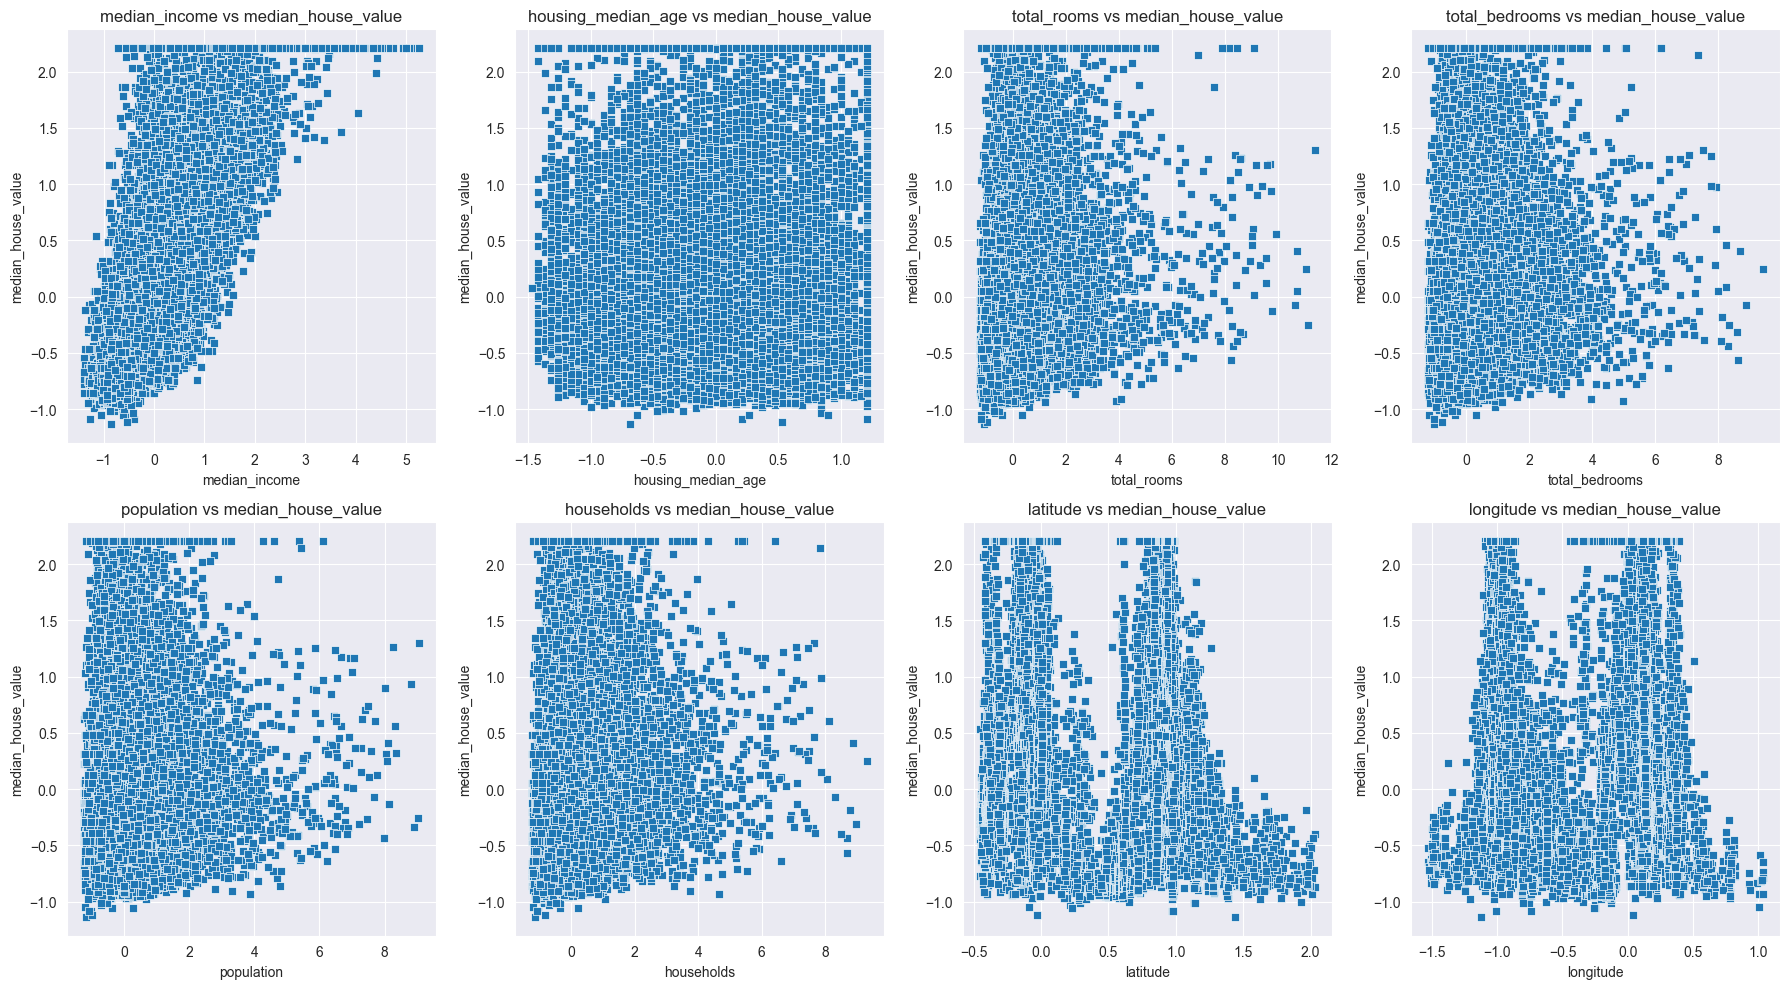

In [368]:
# Creating a dataframe for both knn and lof
houses_knn_outliers_removed = houses_robust_scaled.drop(create_knn_model(48,93.76))
houses_lof_outliers_removed = houses_robust_scaled.drop(main_outliers_lof)
print("KNN graphs")
compare_to_column(houses_knn_outliers_removed, "median_house_value")
print("LOF graphs")
compare_to_column(houses_lof_outliers_removed, "median_house_value")

As we can see both of these methods have done a good job in consolidating our data in such a way that it is much easier to focus on trends within the data without graphs becoming
stuck to one side of a graph however it will be difficult to see which of these methods has been the best for our purpose before we start applying them to models to see which produces the
lowest convergence time.

The only predictor we could use from these processing steps to compare how good our knn and lof models are would be comparing them to our non-algorithmic approach in which knn would look
superior due to the higher % match when compared to LOF's 16%. However, ***as explained above*** knn is much more similar in its approach unlike lof and if we were to simply keep increasing n,
our approach would give identical results whilst being more computationally expensive.

# Imputation

In [3]:
# Importing data
# I found the github link to the dataset which meant I didn't have to download the full dataset into my project files
import pandas as pd
test_houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)
houses_missing = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)
missing_data = houses_missing.isnull()
missing_data_count = missing_data.sum()
print(missing_data_count)
print(houses_missing.count())

Unnamed: 0                0
median_house_value        0
median_income         10320
housing_median_age    10320
total_rooms               0
total_bedrooms            0
population            10320
households                0
latitude                  0
longitude                 0
dtype: int64
Unnamed: 0            20640
median_house_value    20640
median_income         10320
housing_median_age    10320
total_rooms           20640
total_bedrooms        20640
population            10320
households            20640
latitude              20640
longitude             20640
dtype: int64


In [4]:
# KNN imputation
from sklearn.impute import KNNImputer
def createKNNImputer(n_neighbors):
    knnImputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_knn = pd.DataFrame(knnImputer.fit_transform(houses_missing), columns=houses_missing.columns)
    return imputed_knn
knn_imputed = createKNNImputer(5)

In [11]:
# MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# This is the sklearn MICE imputer
def createMICEImputation(random_state):
    imputer = IterativeImputer(random_state=random_state)
    imputer.fit(houses_missing)
    imputed_MICE = pd.DataFrame(imputer.transform(houses_missing),columns=houses_missing.columns)
    return imputed_MICE
MICE_imputed = createMICEImputation(1)

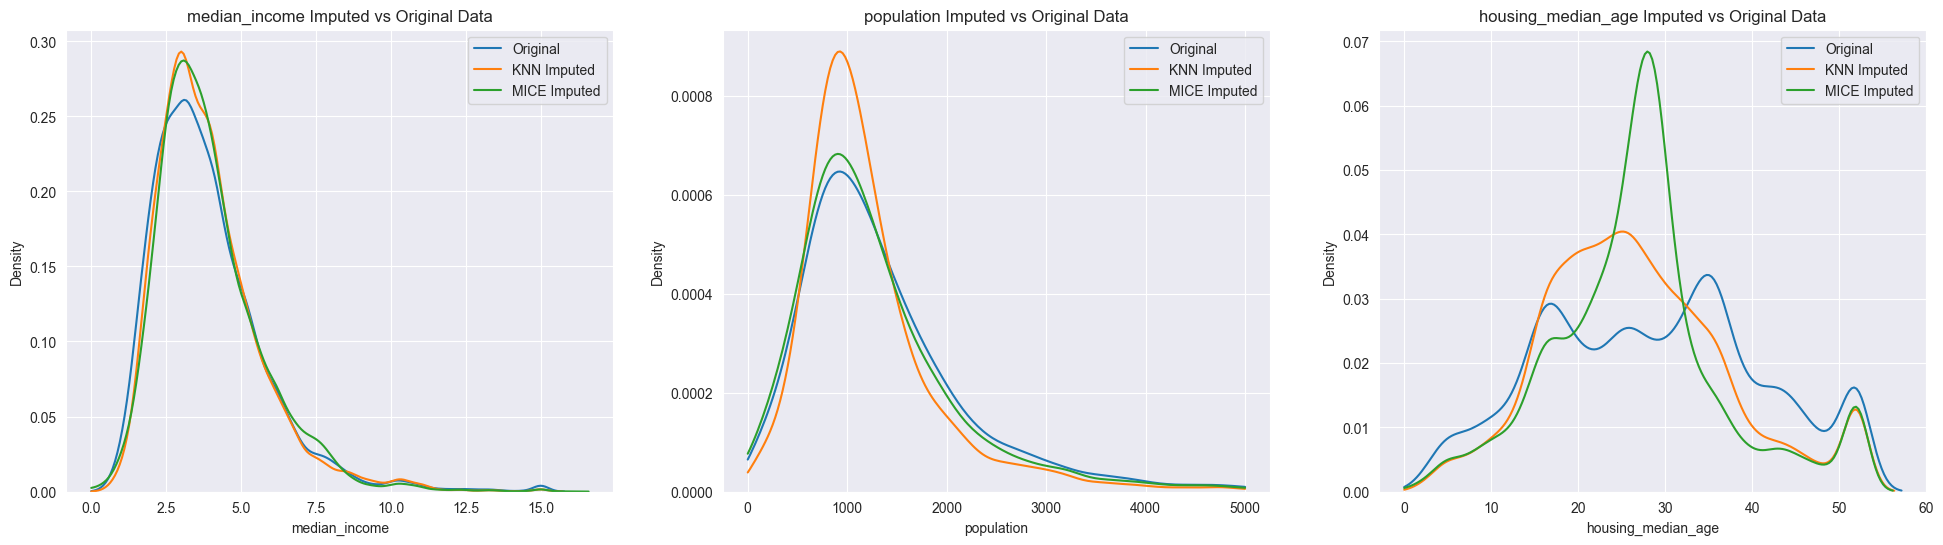

In [12]:
# Compare results to original dataset
missing_indexes = houses_missing.isnull().any(axis=1)
# These are the only columns with missing values within this dataset
imputed_columns = ["median_income", "population", "housing_median_age"]
i = 0
fig, axes = plt.subplots(1,3, figsize=(24,6))
for column in imputed_columns:
    axes[i].set_title(f"{column} Imputed vs Original Data")
    sns.kdeplot(test_houses[column], clip=(0,5000), ax=axes[i])
    sns.kdeplot(knn_imputed[column], clip=(0,5000), ax=axes[i])
    sns.kdeplot(MICE_imputed[column], clip=(0,5000), ax=axes[i])
    axes[i].legend(labels=['Original', 'KNN Imputed', 'MICE Imputed'])
    i +=1

plt.show()

From direct comparisons to the original dataset we can see that for each method, there is one dataset in which we are having a much better imputation and one in which it is up to
interpretation. I would argue that median_income has been imputed roughly equal when it comes to both methods but population is much better with our MICE imputation and whilest still flawed,
KNN has done a better job then MICE during median_age imputation.

# Regression models
Because we are directly comparing these two imputation methods I needed to create the same model for each of the imputation methods so I decided on creating a function that I could call to create the models without having to rewrite or copy code

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
def create_regression_model(data, test_size):
    # Creating a new random state every time a model is made
    state = random.randint(0,100)
    x = data[['median_income', "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "latitude", "longitude"]]
    y = data['median_house_value']
    # Splitting up my dataset into testing and training data
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=state)
    model = LinearRegression()
    # Fitting the model to the training data
    model.fit(x_train,y_train)
    return model, x_test,y_test

In [31]:
# Regression model 1 KNN
M1, M1_x_test, M1_y_test = create_regression_model(knn_imputed, 0.2)

In [32]:
# Regression model 2 MICE
M2, M2_x_test, M2_y_test = create_regression_model(MICE_imputed, 0.2)

In [34]:
# Compare models
from sklearn.metrics import mean_squared_error
import math
# creating predictions for our models based off of the test set
y_pred_M1 = M1.predict(M1_x_test)
y_pred_M2 = M2.predict(M2_x_test)
#Calculating the mean squared error of our models
M1_mse = mean_squared_error(M1_y_test, y_pred_M1)
M2_mse = mean_squared_error(M2_y_test, y_pred_M2)
# Finding the sqrt gives us the RMSE which displays how much our model is off by on average
print(f"KNN rmse: {math.sqrt(M1_mse)} | MICE rmse: {math.sqrt(M2_mse)}")

KNN mse: 63864.68291086819 | MICE mse: 58976.711876728754


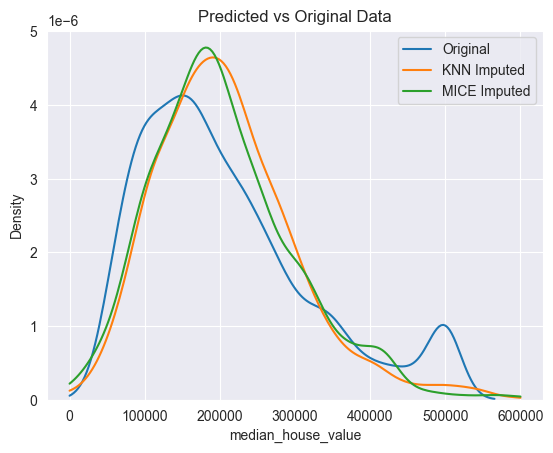

In [41]:
# Graphical representation of performance
plt.title(f"Predicted vs Original Data")
sns.kdeplot(M1_y_test, clip=(0,600000))
sns.kdeplot(y_pred_M1, clip=(0,600000))
sns.kdeplot(y_pred_M2, clip=(0,600000))
plt.legend(labels=['Original', 'KNN Imputed', 'MICE Imputed'])
plt.show()

# Results
Whilest neither model created a very good classification, we can clearly see how **MICE** outperforms **KNN** when it comes to fitting to a regression model with how much lower its rmse is
compared to knn. From our results we can see that **MICE** is on average 5,000 units closer to a correct price then **KNN** is. Our main issue however is that the relationships between variables
within this dataset isn't necessarily linear hence why the performance is so low overall but as we were only concerned with creating a comparison it didn't matter too much which model
we chose as long as they were the same model used on both datasets.

For this dataset I would always be using **MICE** over **KNN** as not only did it outperform **KNN** when it comes to our final model, but it is also non-linear meaning that it fits this dataset much better as there is not a great deal of linear relationships within this dataset.